In [77]:
include("../EuclidElements.jl");

# Book 1

## Proposition 9

To bisect a given recilineal angle.

Note: on this one, trying a more direct construction the first time, although I have generally preferred separating otherwise. This works better for the proof.

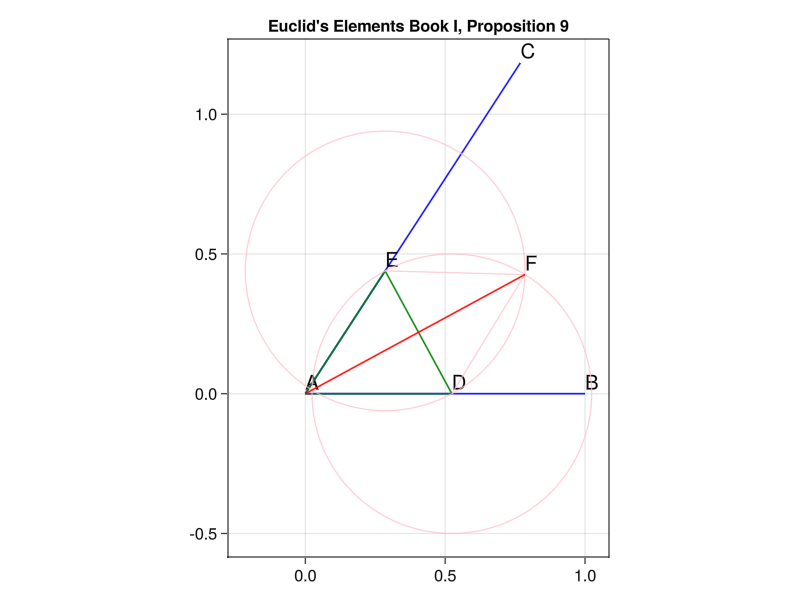

In [70]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 9")

#Let the angle BAC be the given recilineal angle
A = Point2f0(0,0)
B = Point2f0(1,0)
C = Point2f0(rand(Uniform(-1,1)),rand(Uniform(0.1,2)))
norm_C = norm(C)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")
lines!([A,B], color=:blue)
lines!([A,C], color=:blue)

#Thus it is required to bisect it
#Let a point D be taken at random on AB
D = Point2f0(rand(Uniform(0f0, 1f0)), 0)
norm_D = norm(D)
text!(D, text="D")
lines!([A,D], color=:green)

#let AE be cut off from AC equal to AD  [I.3]
#       Just gonna calculus this one -- assumptions are A at 0,0; B at +,0; C at ?,+
∠ = acos((C⋅D)/(norm_C*norm_D))
E = Point2f0(norm_D*cos(∠), norm_D*sin(∠))
text!(E, text="E")
lines!([A,E], color=:green)

#let DE be joined
lines!([E,D], color=:green)

#and on DE let the equilateral triangle DEF be constructed.
D_lines = equilateral_triangle(E, D, color=:pink, linewidth=1f0)
fill_equilateral(D_lines)
F = Point(D_lines)
text!(F, text="F")

#and let AF be joined
lines!([A,F], color=:red)

#For, since AD is equal to AE,
# and AF is common, 
#   the two sides DA, AF are equal to the two sides EA, AF respectively,
#And the base DF is equal to the base EF,
#     therefore the angle DAF is equal to the angle EAF. [I.8]

#Therefore the given recilineal angle BAC has been bisected by the straight line AF.

#QEF

#Draw and show the chart :)
current_figure()

### Animation

In [80]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 9")
xlims!(ax, -2.2,2.2)
ylims!(ax, -1,3)

#Let the angle BAC be the given recilineal angle
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")
lines!([A,B], color=:blue)
lines!([A,C], color=:blue)

#Thus it is required to bisect it
#Let a point D be taken at random on AB
D_opac = Observable(0f0)
text!(D, text="D", color=@lift(RGBA(1,0.75,0.8,$D_opac)))
AD = straight_line(A, D, color=:pink, linewidth=5f0, cursorwidth=0.025f0)

#let AE be cut off from AC equal to AD  [I.3]
AE_circle = whole_circle(A, norm_D, 0f0, color=:pink, linewidth=5f0)
E_opac = Observable(0f0)
text!(E, text="E", color=@lift(RGBA(1,0.75,0.8,$E_opac)))
AE = straight_line(A, E, color=:pink, linewidth=5f0, cursorwidth=0.025f0)

#let DE be joined
ED = straight_line(E, D, color=:pink, linewidth=5f0, cursorwidth=0.025f0)

#and on DE let the equilateral triangle DEF be constructed.
    # redoing this one here for purpose of animation...
D_lines = equilateral_triangle(E, D, color=:pink, linewidth=5f0, cursorlw=0.025f0)
F = Point(D_lines)
F_opac = Observable(0f0)
text!(F, text="F", color=@lift(RGBA(0,1,0,$F_opac)))

#and let AF be joined
AF = straight_line(A, F, color=:green, linewidth=2f0, cursorwidth=0.025f0)


# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 5π, step=5π/(d_s*framerate))

record(f, "Euclid-I-9.gif", timestamps; framerate=framerate) do t
    #BAC is drawn
    #Animate AD
    if t > 0.25π && t < 0.5π
        D_opac[] = (t-0.25π)/0.25π
    elseif t >= 0.5π && t <= 3.5π
        D_opac[] = 1
    elseif t > 3.5π && t < 3.75π
        D_opac[] = 1f0-(t-3.5π)/0.25π
    elseif t >= 3.75π
        D_opac[] = 0
    end
    animate_line(AD, 0.5π, π, t, fade_start=3.5π, fade_end=4π)

    #Animate AE
    animate_circle(AE_circle, π, 1.5π, t, fade_start=2π, fade_end=2.5π)
    if t > 1.25π && t < 1.5π
        E_opac[] = (t-1.25π)/0.25π
    elseif t >= 1.5π && t <= 3.5π
        E_opac[] = 1
    elseif t > 3.5π && t < 3.75π
        E_opac[] = 1f0-(t-3.5π)/0.25π
    elseif t >= 3.75π
        E_opac[] = 0
    end
    animate_line(AE, 1.5π, 2π, t, fade_start=3.5π, fade_end=4π)

    #Animate DE
    animate_line(ED, 2π, 2.5π, t, fade_start=3.5π, fade_end=4π)

    #Animate DEF
    animate_equilateral(D_lines, 2.5π, 3π, t, fade_start=3.5π, fade_end=4π)
    if t > 3π && t < 3.25π
        F_opac[] = (t-3π)/0.25π
    elseif t >= 3.25π
        F_opac[] = 1
    end

    #Animate AF
    animate_line(AF, 3.25π, 3.75π, t)
end;

#For, since AD is equal to AE,
# and AF is common, 
#   the two sides DA, AF are equal to the two sides EA, AF respectively,
#And the base DF is equal to the base EF,
#     therefore the angle DAF is equal to the angle EAF. [I.8]

#Therefore the given recilineal angle BAC has been bisected by the straight line AF.

#QEF

![animation](Euclid-I-9.gif)